In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install -U spacy

In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-07-11 19:22:04.501845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-11 19:22:04.501894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - wordcloud


The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py39hb82d6ee_0

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [6]:
pip install nltk

In [7]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
nlp=spacy.load('en_core_web_md')

In [9]:
!python -m spacy download en_core_web_sm
nlp=spacy.load('en_core_web_sm')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-07-11 19:27:37.757260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-11 19:27:37.757310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
book=pd.read_csv("C:\\Users\\NITESH\\Documents\\Book1.txt",error_bad_lines=False,encoding='Latin-1')
book

,x
0,Minqing Hu and Bing Liu
1,Department of Computer Science
2,University of Illinois at Chicago
3,851 South Morgan Street
4,"Chicago, IL 60607-7053"
...,...
1098,"[43]. Wiebe, J. 2000. Learning Subjective Adje..."
1099,Corpora. AAAI00.
1100,"[44]. Wiebe, J., Bruce, R., and OHara, T. 199..."
1101,and Use of a Gold Standard Data Set for Subjec...


In [20]:
len(book)

1103

In [21]:
book=[x.strip() for x in book.x]
book=[x for x in book if x]
book[0:10]

['Minqing Hu and Bing Liu',
 'Department of Computer Science',
 'University of Illinois at Chicago',
 '851 South Morgan Street',
 'Chicago, IL 60607-7053',
 '{mhu1, liub}@cs.uic.edu',
 'ABSTRACT',
 'Merchants selling products on the Web often ask their customers',
 'to review the products that they have purchased and the',
 'associated services. As e-commerce is becoming more and more']

In [22]:
text=''.join(book)
text

"Minqing Hu and Bing LiuDepartment of Computer ScienceUniversity of Illinois at Chicago851 South Morgan StreetChicago, IL 60607-7053{mhu1, liub}@cs.uic.eduABSTRACTMerchants selling products on the Web often ask their customersto review the products that they have purchased and theassociated services. As e-commerce is becoming more and morepopular, the number of customer reviews that a product receivesgrows rapidly. For a popular product, the number of reviews canbe in hundreds or even thousands. This makes it difficult for apotential customer to read them to make an informed decision onwhether to purchase the product. It also makes it difficult for themanufacturer of the product to keep track and to manage customeropinions. For the manufacturer, there are additional difficultiesbecause many merchant sites may sell the same product and themanufacturer normally produces many kinds of products. In thisresearch, we aim to mine and to summarize all the customerreviews of a product. This sum

In [23]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Minqing Hu and Bing LiuDepartment of Computer ScienceUniversity of Illinois at Chicago851 South Morgan StreetChicago IL 606077053mhu1 liubcsuiceduABSTRACTMerchants selling products on the Web often ask their customersto review the products that they have purchased and theassociated services As ecommerce is becoming more and morepopular the number of customer reviews that a product receivesgrows rapidly For a popular product the number of reviews canbe in hundreds or even thousands This makes it difficult for apotential customer to read them to make an informed decision onwhether to purchase the product It also makes it difficult for themanufacturer of the product to keep track and to manage customeropinions For the manufacturer there are additional difficultiesbecause many merchant sites may sell the same product and themanufacturer normally produces many kinds of products In thisresearch we aim to mine and to summarize all the customerreviews of a product This summarization task is d

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Minqing', 'Hu', 'and', 'Bing', 'LiuDepartment', 'of', 'Computer', 'ScienceUniversity', 'of', 'Illinois', 'at', 'Chicago851', 'South', 'Morgan', 'StreetChicago', 'IL', '606077053mhu1', 'liubcsuiceduABSTRACTMerchants', 'selling', 'products', 'on', 'the', 'Web', 'often', 'ask', 'their', 'customersto', 'review', 'the', 'products', 'that', 'they', 'have', 'purchased', 'and', 'theassociated', 'services', 'As', 'ecommerce', 'is', 'becoming', 'more', 'and', 'morepopular', 'the', 'number', 'of', 'customer', 'reviews', 'that']


In [26]:
len(text_tokens)

7671

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
lower_words=[x.lower() for x in text_tokens]
print(lower_words[0:25])

['minqing', 'hu', 'and', 'bing', 'liudepartment', 'of', 'computer', 'scienceuniversity', 'of', 'illinois', 'at', 'chicago851', 'south', 'morgan', 'streetchicago', 'il', '606077053mhu1', 'liubcsuiceduabstractmerchants', 'selling', 'products', 'on', 'the', 'web', 'often', 'ask']


In [29]:
len(lower_words)

7671

In [30]:
my_stop_words=stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
my_stop_words.append('the')
no_stop_tokens=[word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['minqing', 'hu', 'bing', 'liudepartment', 'computer', 'scienceuniversity', 'illinois', 'chicago851', 'south', 'morgan', 'streetchicago', 'il', '606077053mhu1', 'liubcsuiceduabstractmerchants', 'selling', 'products', 'web', 'often', 'ask', 'customersto', 'review', 'products', 'purchased', 'theassociated', 'services', 'ecommerce', 'becoming', 'morepopular', 'number', 'customer', 'reviews', 'product', 'receivesgrows', 'rapidly', 'popular', 'product', 'number', 'reviews', 'canbe', 'hundreds']


In [32]:
len(no_stop_tokens)

4870

In [33]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [34]:
stemmed_tokens=[ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['minq', 'hu', 'bing', 'liudepart', 'comput', 'scienceunivers', 'illinoi', 'chicago851', 'south', 'morgan', 'streetchicago', 'il', '606077053mhu1', 'liubcsuiceduabstractmerch', 'sell', 'product', 'web', 'often', 'ask', 'customersto', 'review', 'product', 'purchas', 'theassoci', 'servic', 'ecommerc', 'becom', 'morepopular', 'number', 'custom', 'review', 'product', 'receivesgrow', 'rapidli', 'popular', 'product', 'number', 'review', 'canb', 'hundr']


In [35]:
len(stemmed_tokens)

4870

In [36]:
for w in no_stop_tokens:
    print(w,":",ps.stem(w))

minqing : minq
hu : hu
bing : bing
liudepartment : liudepart
computer : comput
scienceuniversity : scienceunivers
illinois : illinoi
chicago851 : chicago851
south : south
morgan : morgan
streetchicago : streetchicago
il : il
606077053mhu1 : 606077053mhu1
liubcsuiceduabstractmerchants : liubcsuiceduabstractmerch
selling : sell
products : product
web : web
often : often
ask : ask
customersto : customersto
review : review
products : product
purchased : purchas
theassociated : theassoci
services : servic
ecommerce : ecommerc
becoming : becom
morepopular : morepopular
number : number
customer : custom
reviews : review
product : product
receivesgrows : receivesgrow
rapidly : rapidli
popular : popular
product : product
number : number
reviews : review
canbe : canb
hundreds : hundr
even : even
thousands : thousand
makes : make
difficult : difficult
apotential : apotenti
customer : custom
read : read
make : make
informed : inform
decision : decis
onwhether : onwheth
purchase : purchas
product :

opinions : opinion
certain : certain
productfeatures : productfeatur
sentences : sentenc
may : may
express : express
negativeopinions : negativeopinion
product : product
features : featur
2 : 2
work : work
9does : 9doe
mine : mine
product : product
features : featur
reviews : review
thereviewers : thereview
expressed : express
opinions : opinion
3 : 3
method : method
notneed : notne
corpus : corpu
perform : perform
taskin : taskin
30 : 30
morinaga : morinaga
et : et
al : al
compare : compar
reviews : review
different : differ
products : product
inone : inon
category : categori
find : find
reputation : reput
target : target
producthowever : producthowev
summarize : summar
reviews : review
mineproduct : mineproduct
features : featur
reviewers : review
expressed : express
theiropinions : theiropinion
although : although
find : find
frequent : frequent
phrases : phrase
indicatingreputations : indicatingreput
phrases : phrase
may : may
product : product
features : featur
egdoesnt : egdoe

pruningfrequent : pruningfrequ
featureidentificationsummaryopinion : featureidentificationsummaryopinion
wordextractionopinion : wordextractionopinion
orientationidentificationinfrequentfeatures : orientationidentificationinfrequentfeatur
resulting : result
frequent : frequent
features : featur
semantic : semant
orientations : orient
theopinion : theopinion
words : word
identified : identifi
help : help
wordnet : wordnet
using : use
theextracted : theextract
opinion : opinion
words : word
system : system
finds : find
infrequentfeatures : infrequentfeatur
last : last
two : two
steps : step
orientation : orient
opinionsentence : opinionsent
identified : identifi
final : final
summary : summari
produced : produc
note : note
thatpos : thatpo
tagging : tag
partofspeech : partofspeech
tagging : tag
28 : 28
naturallanguage : naturallanguag
processing : process
helps : help
us : us
find : find
opinion : opinion
featuresbelow : featuresbelow
discuss : discuss
substeps : substep
turn31 : turn31


semantic : semant
orientation : orient
phrase : phrase
calculated : calcul
mutualinformation : mutualinform
given : given
phrase : phrase
word : word
excellentminus : excellentminu
mutual : mutual
information : inform
given : given
phrase : phrase
theword : theword
poor : poor
mutual : mutual
information : inform
estimated : estim
issuingqueries : issuingqueri
search : search
engine : engin
noting : note
number : number
hits : hit
thepaper : thepap
42 : 42
however : howev
report : report
results : result
semanticorientations : semanticorient
individual : individu
wordsphrases : wordsphras
instead : instead
gives : give
theclassification : theclassif
results : result
reviews : review
use : use
techniquesin : techniquesin
paper : paper
works : work
rely : reli
statistical : statist
information : inform
arather : arath
big : big
corpus : corpu
methods : method
also : also
inefficient : ineffici
examplein : examplein
42 : 42
word : word
phrase : phrase
web : web
search : search
sub

detailed : detail
procedure : procedur
isdescribed : isdescrib
figure : figur
7procedure : 7procedur
sentenceorietation : sentenceoriet
deals : deal
three : three
situations : situat
predicting : predict
semantic : semant
orientation : orient
opinion : opinion
sentence1 : sentence1
user : user
likes : like
dislikes : dislik
features : featur
onesentence : onesent
opinion : opinion
words : word
mostly : mostli
either : either
positive : posit
ornegative : orneg
eg : eg
two : two
positive : posit
opinion : opinion
words : word
good : good
andexceptional : andexcept
overall : overal
good : good
camera : camera
reallygood : reallygood
picture : pictur
clarity : clariti
exceptional : except
closeup : closeup
shootingcapability2 : shootingcapability2
user : user
likes : like
dislikes : dislik
features : featur
one : one
sentencebut : sentencebut
equal : equal
number : number
positive : posit
negative : neg
opinionwords : opinionword
eg : eg
the : the
auto : auto
manual : manual
along :

9 : 9
10 : 10
give : give
results : result
infrequentfeature : infrequentfeatur
identification : identif
done : done
recall : recal
improved : improv
dramaticallythe : dramaticallyth
precision : precis
drops : drop
percents : percent
average : averag
however : howev
isnot : isnot
major : major
problem : problem
infrequent : infrequ
features : featur
rankedrather : rankedrath
low : low
thus : thu
affect : affect
usersto : usersto
illustrate : illustr
effectiveness : effect
feature : featur
extractiontable : extractiont
1 : 1
recall : recal
precision : precis
step : step
feature : featur
generationfrequent : generationfrequ
featuresassociation : featuresassoci
miningcompactnesspruningpsupportpruninginfrequent : miningcompactnesspruningpsupportpruninginfrequ
featureidentificationproduct : featureidentificationproduct
nameno : nameno
ofmanualfeatures : ofmanualfeatur
recall : recal
precision : precis
recall : recal
precision : precis
recall : recal
precision : precis
recall : recal
precisi

aaai04 : aaai04
200420 : 200420
huettner : huettner
subasic : subas
p : p
2000 : 2000
fuzzy : fuzzi
typing : type
fordocument : fordocu
management : manag
acl00 : acl00
companion : companion
volumetutorial : volumetutori
abstracts : abstract
demonstration : demonstr
notes21 : notes21
jacquemin : jacquemin
c : c
bourigault : bourigault
2001 : 2001
term : term
extractionand : extractionand
automatic : automat
indexing : index
r : r
mitkov : mitkov
editor : editor
handbook : handbook
ofcomputational : ofcomput
linguistics : linguist
oxford : oxford
university : univers
press22 : press22
justeson : justeson
j : j
katz : katz
sm : sm
1995 : 1995
technicalterminology : technicalterminolog
linguistic : linguist
properties : properti
algorithmfor : algorithmfor
identification : identif
text : text
natural : natur
language : languag
engineering1192723 : engineering1192723
karlgren : karlgren
j : j
cutting : cut
1994 : 1994
recognizing : recogn
text : text
genreswith : genreswith
simple : si

In [37]:
doc=nlp(''.join (stemmed_tokens))
print(doc[0:40])

minqhubingliudepartcomputscienceuniversillinoichicago851southmorganstreetchicagoil606077053mhu1liubcsuiceduabstractmerchsellproductweboftenaskcustomerstoreviewproductpurchastheassociservicecommercbecommorepopularnumbercustomreviewproductreceivesgrowrapidlipopularproductnumberreviewcanbhundreventhousandmakedifficultapotenticustomreadmakeinformdecisonwhethpurchasproductalsomakedifficultthemanufacturproductkeeptrackmanagcustomeropinionmanufacturadditdifficultiesbecausmanimerchantsitemaysellproductthemanufacturnormalproducmanikindproductthisresearchaimminesummarcustomerreviewproductsummartaskdifferfromtradittextsummarminefeaturesofproductcustomexpresstheiropinionwhetheropinionpositnegdonotsummarreviewselectsubsetrewritsomeoforiginsentencreviewcapturmainpointclassictextsummartaskperformedinthreestep1mineproductfeaturbeencomcustom2identifiopinionsentencineachreviewdecidwhetheropinionsentencispositneg3summarresultpaperpropossevernoveltechniquperformtaskourexperimentresultusereviewnumberproduc

In [38]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['minqhubingliudepartcomputscienceuniversillinoichicago851southmorganstreetchicagoil606077053mhu1liubcsuiceduabstractmerchsellproductweboftenaskcustomerstoreviewproductpurchastheassociservicecommercbecommorepopularnumbercustomreviewproductreceivesgrowrapidlipopularproductnumberreviewcanbhundreventhousandmakedifficultapotenticustomreadmakeinformdecisonwhethpurchasproductalsomakedifficultthemanufacturproductkeeptrackmanagcustomeropinionmanufacturadditdifficultiesbecausmanimerchantsitemaysellproductthemanufacturnormalproducmanikindproductthisresearchaimminesummarcustomerreviewproductsummartaskdifferfromtradittextsummarminefeaturesofproductcustomexpresstheiropinionwhetheropinionpositnegdonotsummarreviewselectsubsetrewritsomeoforiginsentencreviewcapturmainpointclassictextsummartaskperformedinthreestep1mineproductfeaturbeencomcustom2identifiopinionsentencineachreviewdecidwhetheropinionsentencispositneg3summarresultpaperpropossevernoveltechniquperformtaskourexperimentresultusereviewnumberprod

In [39]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
for w in stemmed_tokens:
    print(w,":",lemmatizer.lemmatize(w))

minq : minq
hu : hu
bing : bing
liudepart : liudepart
comput : comput
scienceunivers : scienceunivers
illinoi : illinoi
chicago851 : chicago851
south : south
morgan : morgan
streetchicago : streetchicago
il : il
606077053mhu1 : 606077053mhu1
liubcsuiceduabstractmerch : liubcsuiceduabstractmerch
sell : sell
product : product
web : web
often : often
ask : ask
customersto : customersto
review : review
product : product
purchas : purchas
theassoci : theassoci
servic : servic
ecommerc : ecommerc
becom : becom
morepopular : morepopular
number : number
custom : custom
review : review
product : product
receivesgrow : receivesgrow
rapidli : rapidli
popular : popular
product : product
number : number
review : review
canb : canb
hundr : hundr
even : even
thousand : thousand
make : make
difficult : difficult
apotenti : apotenti
custom : custom
read : read
make : make
inform : inform
decis : decis
onwheth : onwheth
purchas : purchas
product : product
also : also
make : make
difficult : difficult
th

document : document
taski : taski
differ : differ
aim : aim
identifi : identifi
product : product
featur : featur
user : user
opinionson : opinionson
featur : featur
automat : automat
produc : produc
summari : summari
also : also
notempl : notempl
use : use
summari : summari
generationour : generationour
work : work
also : also
relat : relat
differ : differ
subject : subject
genreclassif : genreclassif
sentiment : sentiment
classif : classif
text : text
summar : summar
andterminolog : andterminolog
find : find
discuss : discus
below21 : below21
subject : subject
genr : genr
classificationgenr : classificationgenr
classif : classif
classifi : classifi
text : text
differ : differ
style : style
egeditorial : egeditorial
novel : novel
news : news
poem : poem
etc : etc
although : although
sometechniqu : sometechniqu
genr : genr
classif : classif
recogn : recogn
document : document
thatexpress : thatexpress
opinion : opinion
23 : 23
24 : 24
14 : 14
tell : tell
whether : wheth

performedwhich : performedwhich
includ : includ
remov : remov
stopword : stopword
stem : stem
fuzzymatch : fuzzymatch
fuzzi : fuzzi
match : match
use : use
deal : deal
word : word
variant : variant
andmisspel : andmisspel
1932 : 1932
frequent : frequent
featur : featur
identificationthi : identificationthi
substep : substep
identifi : identifi
product : product
featur : featur
mani : mani
peoplehav : peoplehav
express : express
opinion : opinion
discuss : discus
frequent : frequent
featureidentif : featureidentif
first : first
give : give
exampl : exampl
sentenc : sentenc
somereview : somereview
describ : describ
kind : kind
opinion : opinion
behandl : behandl
sinc : sinc
system : system
aim : aim
find : find
peopl : peopl
like : like
anddislik : anddislik
given : given
product : product
find : find
product : product
featuresthat : featuresthat
peopl : peopl
talk : talk
crucial : crucial
step : step
howev : howev
due : due
thedifficulti : thedifficulti
natur : natur
languag : languag
u

given : given
enough : enough
seed : seed
adjectiveswith : adjectiveswith
known : known
orient : orient
almost : almost
predict : predict
orient : orient
ofal : ofal
adject : adject
word : word
review : review
collectionthu : collectionthu
strategi : strategi
use : use
set : set
seed : seed
adject : adject
weknow : weknow
orient : orient
grow : grow
set : set
search : search
thewordnet : thewordnet
reason : reason
broad : broad
rang : rang
adject : adject
wefirst : wefirst
manual : manual
come : come
set : set
common : common
adject : adject
ourexperi : ourexperi
use : use
30 : 30
seed : seed
list : list
eg : eg
posit : posit
adjectivesgreat : adjectivesgreat
fantast : fantast
nice : nice
cool : cool
neg : neg
adject : adject
bad : bad
dullthen : dullthen
resort : resort
wordnet : wordnet
predict : predict
orient : orient
theadject : theadject
opinion : opinion
word : word
list : list
adjective : adjective
orientationi : orientationi
predict : predict
ad : ad
seed : seed
list : list


rank : rank
accord : accord
frequenc : frequenc
theirappear : theirappear
review : review
featur : featur
phrase : phrase
appear : appear
beforesingl : beforesingl
word : word
featur : featur
phrase : phrase
normal : normal
interestingto : interestingto
user : user
type : type
rank : rank
also : also
possibl : possibl
forexampl : forexampl
also : also
rank : rank
featur : featur
accord : accord
number : number
ofreview : ofreview
express : express
posit : posit
neg : neg
opinionsth : opinionsth
follow : follow
show : show
exampl : exampl
summari : summari
featurepicture : featurepicture
digit : digit
camera : camera
note : note
individu : individu
opinionsent : opinionsent
correspond : correspond
review : review
shownher : shownher
hidden : hidden
use : use
hyperlink : hyperlink
order : order
enabl : enabl
userto : userto
see : see
global : global
view : view
summari : summari
easilyfeatur : easilyfeatur
pictureposit : pictureposit
12 : 12
overal : overal
good : good
camera : cam

0634 : 0634
0554 : 0554
0946cellular : 0946cellular
phone : phone
0675 : 0675
0815 : 0815
0764mp3 : 0764mp3
player : player
0784 : 0784
0589 : 0589
0842dvd : 0842dvd
player : player
0653 : 0653
0607 : 0607
0730averag : 0730averag
0693 : 0693
0642 : 0642
0842in : 0842in
summari : summari
see : see
techniqu : techniqu
promisingespeci : promisingespeci
sentenc : sentenc
orient : orient
predict : predict
believ : believ
thatthey : thatthey
may : may
use : use
practic : practic
set : set
also : also
note : note
three : three
mainlimit : mainlimit
system : system
1 : 1
dealt : dealt
opinionsent : opinionsent
need : need
pronoun : pronoun
resolut : resolut
40 : 40
instanc : instanc
it : it
isquiet : isquiet
powerful : powerful
understand : understand
repres : repres
pronounresolut : pronounresolut
need : need
perform : perform
pronoun : pronoun
resolut : resolut
complexand : complexand
comput : comput
expens : expens
problem : problem
natur : natur
languageprocess : languageprocess
nlp : 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [42]:
print(vectorizer.vocabulary_)

{'minqhubingliudepartcomputscienceuniversillinoichicago851southmorganstreetchicagoil606077053mhu1liubcsuiceduabstractmerchsellproductweboftenaskcustomerstoreviewproductpurchastheassociservicecommercbecommorepopularnumbercustomreviewproductreceivesgrowrapidlipopularproductnumberreviewcanbhundreventhousandmakedifficultapotenticustomreadmakeinformdecisonwhethpurchasproductalsomakedifficultthemanufacturproductkeeptrackmanagcustomeropinionmanufacturadditdifficultiesbecausmanimerchantsitemaysellproductthemanufacturnormalproducmanikindproductthisresearchaimminesummarcustomerreviewproductsummartaskdifferfromtradittextsummarminefeaturesofproductcustomexpresstheiropinionwhetheropinionpositnegdonotsummarreviewselectsubsetrewritsomeoforiginsentencreviewcapturmainpointclassictextsummartaskperformedinthreestep1mineproductfeaturbeencomcustom2identifiopinionsentencineachreviewdecidwhetheropinionsentencispositneg3summarresultpaperpropossevernoveltechniquperformtaskourexperimentresultusereviewnumberprod

In [43]:
print(vectorizer.get_feature_names()[1:20])
print(x.toarray()[0:50])

['0044wiebjbrucero', '00companionvolumetutoriabstractdemonstrnotes21jacquemincbourigault2001termextractionandautomatindexrmitkoveditorhandbookofcomputlinguistoxforduniverspress22justesonjkatzsm1995technicalterminologlinguistpropertialgorithmforidentiftextnaturlanguagengineering1192723karlgrenjcut1994recogntextgenreswithsimplmetricusediscriminanalysiscoling', '019daveklawrencpennock2003minethepeanutgalleriopinionextractsemanticclassifproductreviewwww', '0231nlprocessor', '0243wiebj2000learnsubjectadjectfromcorporaaaai', '0310dejongg1982overviewfrumpsystemstrateginaturlanguagpars14917611fastrhttpwwwlimsifrindividujacquemifastr12fellbaumc1998wordnetelectronlexicaldatabasmitpress13finnkushmerickn2003learnclassifydocuaccordgenrijcai03workshoponcomputapproachstyleanalysisynthesis14finnkushmericknsmythb2002genreclassifdomaintransferinformationfiltproceuropeancolloquiuminformationretrievresearchpage35336215goldsteinjkantrowitzmittalvcarbonelj1999summartextdocumentsentencselectionandevalumetric

In [44]:
print(x.toarray().shape)

(1, 117)


In [45]:
x.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [46]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)

In [47]:
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(book)

In [48]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'adjective', 'adjectives', 'all', 'also', 'an', 'and', 'and the', 'are', 'as', 'based', 'be', 'by', 'camera', 'can', 'classification', 'customer', 'each', 'extraction', 'feature', 'features', 'find', 'for', 'for each', 'frequent', 'from', 'have', 'if', 'in', 'in the', 'in this', 'information', 'infrequent', 'is', 'it', 'list', 'may', 'mining', 'more', 'negative', 'not', 'noun', 'number', 'number of', 'of', 'of the', 'on', 'one', 'only', 'opinion', 'opinion sentence', 'opinion words', 'opinions', 'or', 'orientation', 'orientation of', 'orientations', 'our', 'phrase', 'phrases', 'positive', 'positive or', 'positive or negative', 'precision', 'product', 'product features', 'products', 'recall', 'results', 'review', 'reviews', 'semantic', 'sentence', 'sentences', 'set', 'some', 'summarization', 'summary', 'system', 'techniques', 'text', 'that', 'the', 'the opinion', 'their', 'these', 'they', 'this', 'those', 'to', 'use', 'used', 'using', 'we', 'whether', 'which', 'with', 'word', 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer_ngram_max_features=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(1,3),max_features=500)

In [51]:
tf_idf_matrix=vectorizer_ngram_max_features.fit_transform(book)

In [52]:
print(vectorizer_ngram_max_features.get_feature_names())

['10', '11', '12', '19', '1997', '1999', '20', '2000', '2002', '22', '29', '42', 'aaai', 'about', 'about the', 'according', 'accuracy', 'acl', 'added', 'adjective', 'adjectives', 'adjectives in', 'after', 'algorithm', 'all', 'all the', 'also', 'although', 'amazing', 'an', 'an opinion', 'analysis', 'and', 'and negative', 'and precision', 'and the', 'and to', 'antonym', 'any', 'appear', 'are', 'are also', 'are very', 'around', 'as', 'as the', 'association', 'association mining', 'at', 'automatic', 'average', 'based', 'based on', 'be', 'because', 'been', 'begin', 'between', 'both', 'but', 'by', 'called', 'camera', 'can', 'can be', 'case', 'classification', 'classification of', 'closely', 'columns', 'common', 'compactness', 'contain', 'contains', 'customer', 'customer reviews', 'customer reviews of', 'customers', 'data', 'database', 'describe', 'different', 'digital', 'do', 'do not', 'document', 'documents', 'does', 'does not', 'domain', 'each', 'each opinion', 'each opinion sentence', 'ea

In [53]:
print(tf_idf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [55]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

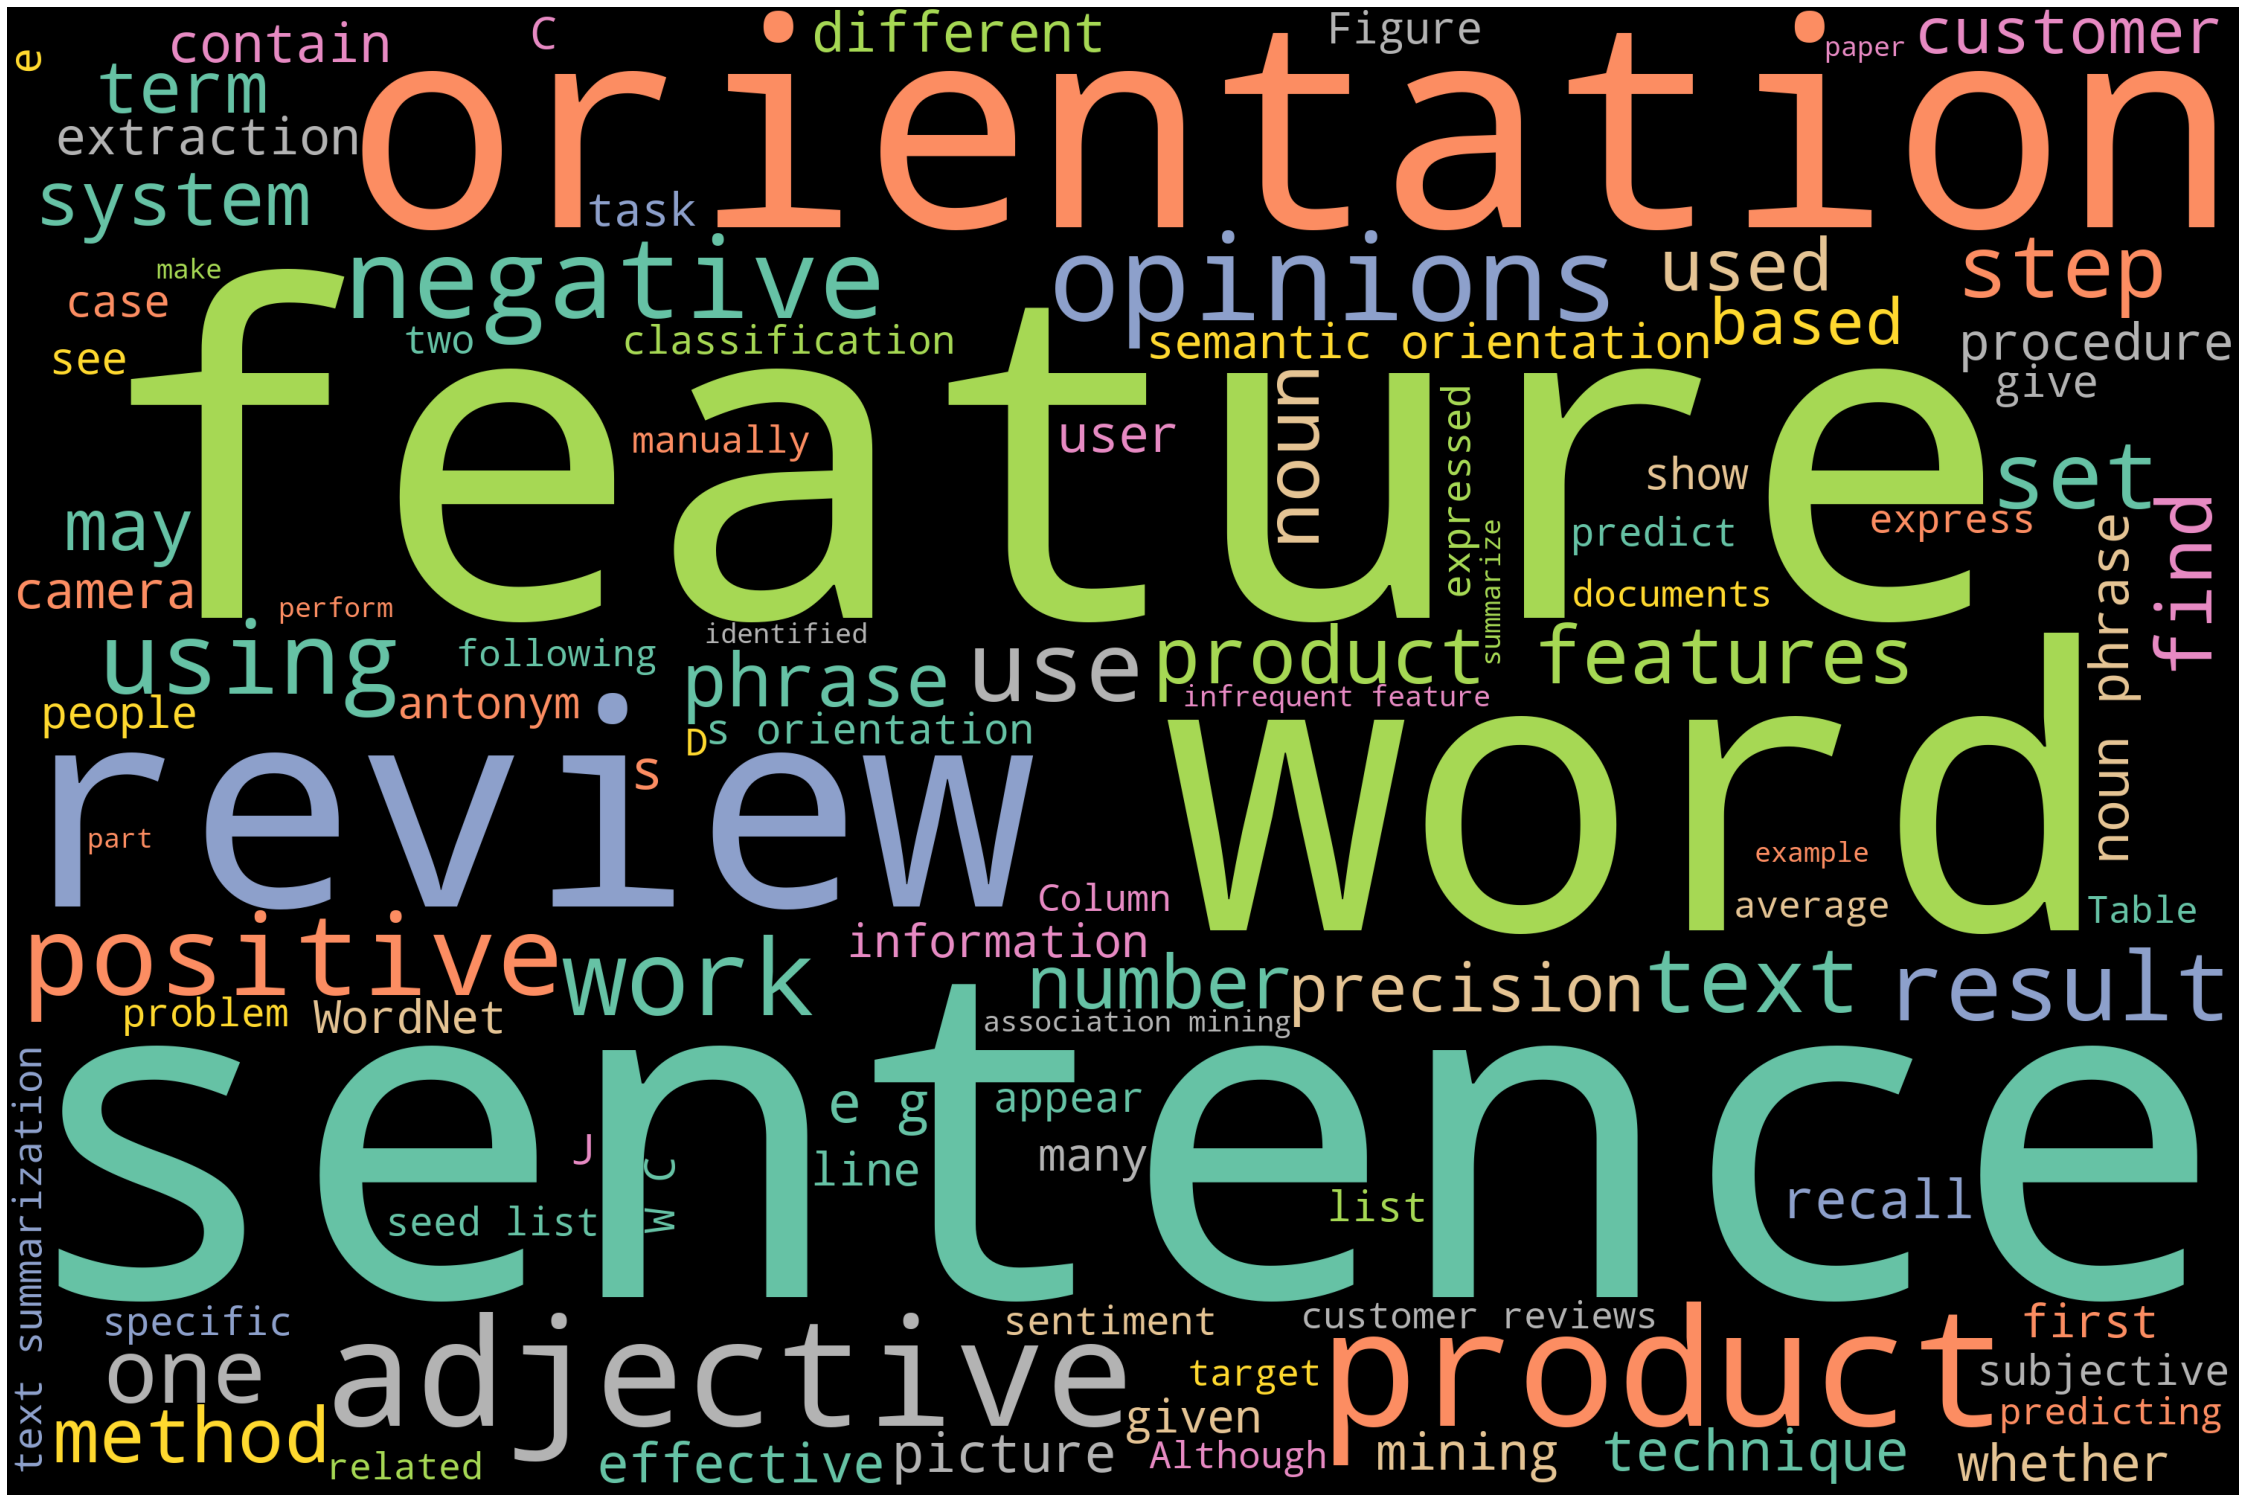

In [57]:
stopwords=STOPWORDS
stopwords.add('opinion')
stopwords.add('summary')
stopwords.add('document')
stopwords.add('frequent')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)